# k-medoids clustering notebook

## We are importing necessary libraries

In [27]:
import numpy as np
from sklearn.metrics import pairwise_distances

## We are defining the k-medoids class

In [28]:
class KMedoids:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4, metric='euclidean', random_state=None):
        """
        K-Medoids clustering algorithm.
        
        Parameters:
        - n_clusters: Number of clusters.
        - max_iter: Maximum number of iterations.
        - tol: Convergence tolerance.
        - metric: Distance metric for clustering.
        - random_state: Random seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.metric = metric
        self.random_state = random_state
        self.medoids = None
        self.labels_ = None

## Fit the model to data

In [29]:
def fit(self, X):
        """
        Fit the K-Medoids model to the data.

        Parameters:
        - X: Input data (numpy array of shape [n_samples, n_features]).
        """
        np.random.seed(self.random_state)
        n_samples = X.shape[0]

        # 1. Calculate the distance between every pair of points
        distance_matrix = pairwise_distances(X, metric=self.metric)

        # 2. Then, we have to pick the initial medoids randomly
        medoid_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.medoids = X[medoid_indices]

        for _ in range(self.max_iter):
            # 3. Then, we have to assign each data point to the nearest medoid
            labels = np.argmin(distance_matrix[:, medoid_indices], axis=1)

            # Then, we have to create a copy of medoid indices to update
            new_medoids = medoid_indices.copy()

            # 4. Then, we have to update each medoid by finding the most central point in the cluster
            for i in range(self.n_clusters):
                cluster_indices = np.where(labels == i)[0]  # Get inde of points in cluster
                if len(cluster_indices) == 0:
                    continue  # Skip empty clusters

                # Then, we have to compute sum of distances for each point in the cluster
                intra_distances = np.sum(distance_matrix[np.ix_(cluster_indices, cluster_indices)], axis=1)

                # Then, choose the point with the smallest total distance as the new medoid
                best_medoid = cluster_indices[np.argmin(intra_distances)]
                new_medoids[i] = best_medoid

            # 5. Then, finally we have to check if medoids have changed or not
            if np.all(medoid_indices == new_medoids):
                break
            medoid_indices = new_medoids

        # Finally, store final medoids and labels
        self.medoids = X[medoid_indices]
        self.labels_ = np.argmin(distance_matrix[:, medoid_indices], axis=1)
KMedoids.fit = fit    

## Predict new data points

In [30]:
def predict(self, X):
        """
        Predict the closest cluster for each sample in X.
        
        Parameters:
        - X: New data points to be assigned to clusters.
        
        Returns:
        - labels: Index of the nearest medoid for each sample.
        """
        distance_matrix = pairwise_distances(X, self.medoids, metric=self.metric)
        return np.argmin(distance_matrix, axis=1)
KMedoids.predict = predict   

## Visualization and Example Usage

        
  
        
        

        

            

        


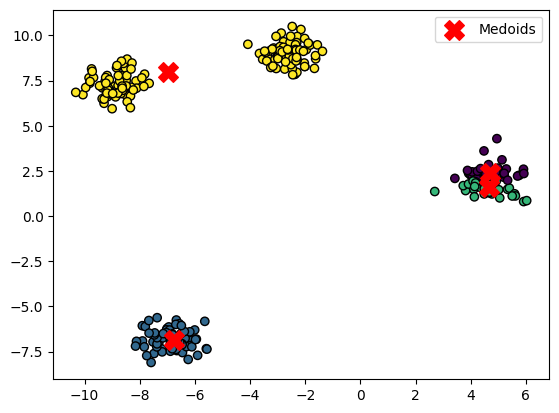

In [31]:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt
    
    # 1. Generate sample data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
    
    # 2. Train K-Medoids on the Data
    kmedoids = KMedoids(n_clusters=4, random_state=42)
    kmedoids.fit(X)
    labels = kmedoids.labels_
    
    # 3. Plot the final results
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.scatter(kmedoids.medoids[:, 0], kmedoids.medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
    plt.legend()
    plt.show()